In [70]:
import tensorflow as tf

AUTOTUNE = tf.data.experimental.AUTOTUNE

import IPython.display as display
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import os

tf.__version__

'2.2.0'

In [3]:
import pathlib
data_dir = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    fname='flower_photos',
    untar=True
)

data_dir = pathlib.Path(data_dir)

228818944/228813984 [==============================] - 2s 0us/step


In [6]:
image_count = len( list( data_dir.glob('*/*.jpg') ) )
image_count

3670

In [9]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != 'LICENCE.txt'])
CLASS_NAMES

array(['daisy', 'dandelion', 'sunflowers', 'tulips', 'roses',
       'LICENSE.txt'], dtype='<U11')

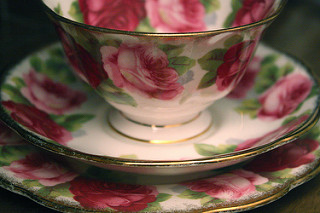

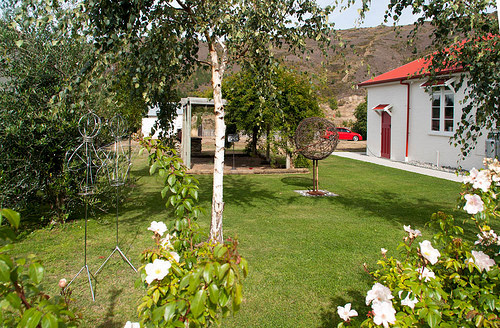

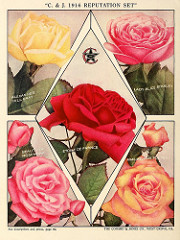

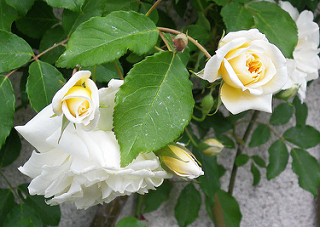

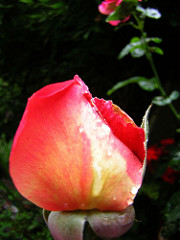

In [76]:
roses = list(data_dir.glob('roses/*'))

for image_path in roses[5:10]:
  display.display(Image.open(str(image_path)))

In [97]:
def transform_images_array():
  imgs_transform = []
  for current_image in roses:
    # transform image in array and transform to grayscale
    image_array = np.asarray( ImageOps.grayscale( Image.open(current_image) ), dtype='float32')
    imgs_transform.append(image_array)
  
  return imgs_transform

In [108]:
def normalize_imgs(imgs):
  normalized_imgs = []
  for current_img in imgs:
    normalized_imgs.append(current_img / 255.0)
  
  return normalized_imgs

In [88]:
def verify_mean_shape(imgs):
  sum_x_shape = 0
  sum_y_shape = 0
  for i in imgs:
    sum_x_shape += i.shape[0]
    sum_y_shape += i.shape[1]
  
  print(sum_x_shape / len(imgs))
  print(sum_y_shape / len(imgs))

In [105]:
def resize_imgs(img_list):
  imgs_resized = []
  for current_img in img_list:
    imgs_resized.append( np.resize( current_img, (274, 274) ) )
  
  return imgs_resized

In [109]:
images = transform_images_array()
images = normalize_imgs(images)

In [90]:
# mean is 274, so i gonne resize to 274 x 274
verify_mean_shape(images)

274.54134165366617
364.3198127925117


In [111]:
images = resize_imgs(images)